<a href="https://colab.research.google.com/github/GerardoMunoz/Curso_Python/blob/main/Num/Num_2_M%C3%A9todos_Directos_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos directos
Los ejercicios resueltos manualmente o con una calculadora usualmente corresponden a este método. Ejemplos de este método son la cuadrática, la eliminación de Gauss entre muchos otros.

## Repaso
* El **error absoluto** ($E$) es la diferencia  entre el valor real ($y_r$) y el valor calculado $y_c$.  $E = |y_r - y_c|$

* El **error relativo** ($e$) es el error relativo sobre el valor real.  $e
=\frac{ |y_r - y_c|}{|y_r|}$

* Los siguientes términos se refieren al mismo significado para una función $f(x)$ en un $x$ dado: la pendiente, la derivada, la tangente, la inclinación.

## Propagación del error

La propagación del error de una función $f(x)$ en un $x$ dado se puede modelar utilizando la derivada de la función. Una medida de este cambio es el número de condición (https://en.wikipedia.org/wiki/Condition_number)


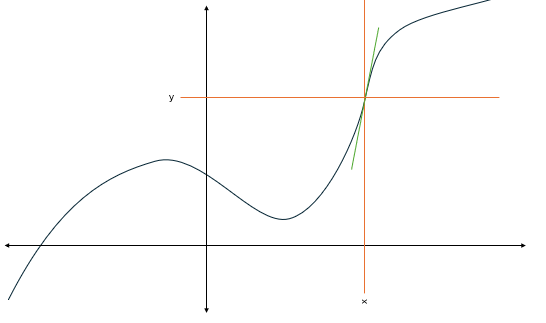

La pendiente permite aproximar cuanto varía el valor de $y$ al disminuir el valor de $x$.

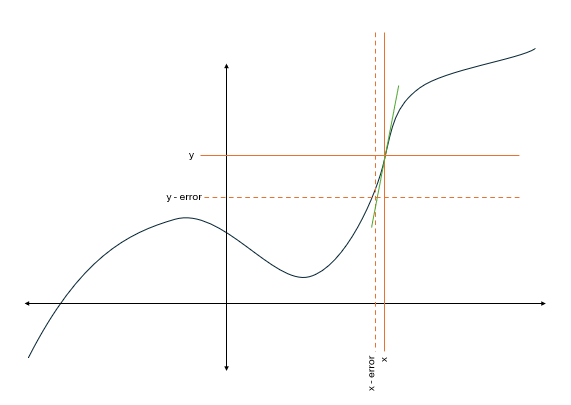

De manera análoga al aumentar el valor de $x$.

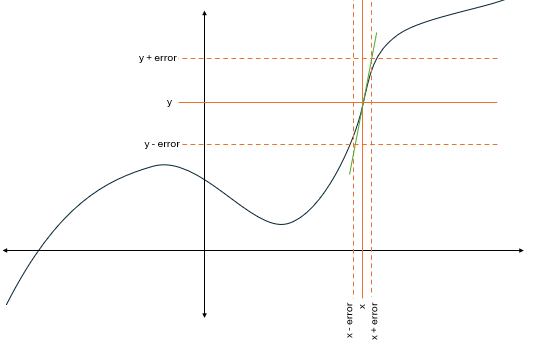

In [1]:
import sympy as sp
x = sp.symbols('x')
f = sp.Function('f')
g = sp.Function('g')

Para visualizar, vamos a simular la entrada $*f*$ no como un valor constate en 2, sino como una señal centrada en 2 con ruido de 0.01 representado por una señal cosenoidal con esa amplitud



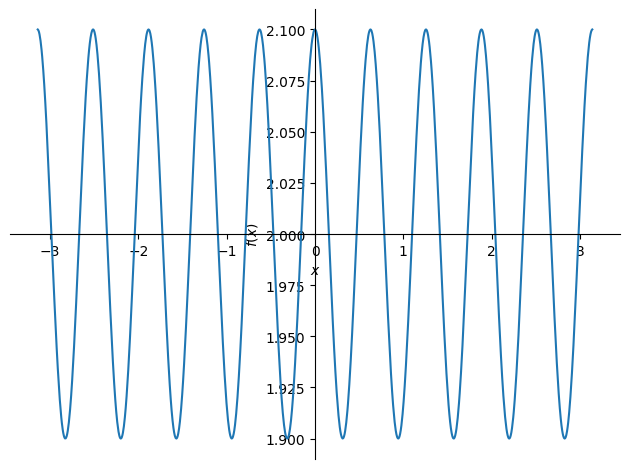

In [2]:
f_ejem=lambda x: 2+0.1*sp.cos(10*x)
sp.plot(f_ejem(x), (x, -3.14, 3.14))


De manera similar para la función $g$

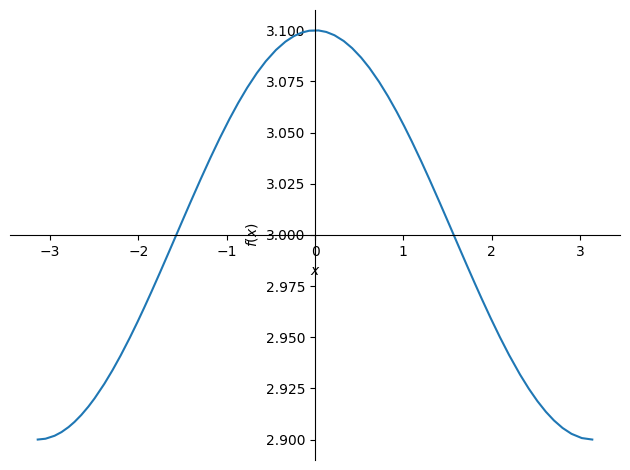

In [3]:
g_ejem=lambda x :3+0.1*sp.cos(x)
sp.plot(g_ejem(x), (x, -3.14, 3.14))

A continuación, veremos cómo se propaga el error para algunas operaciones. Para la función $f$, el error en  $x$ se denota $\frac{d}{dx}f(x)$.

### Suma

$f(x)+g(x)$

In [4]:
(f(x)+g(x)).diff(x)

Derivative(f(x), x) + Derivative(g(x), x)

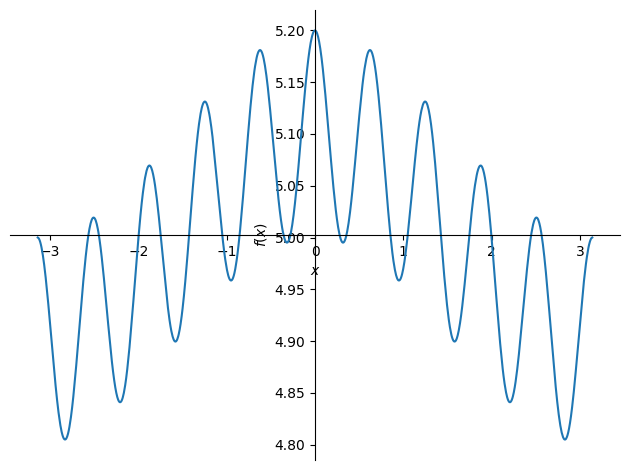

In [5]:
sp.plot(f_ejem(x)+g_ejem(x), (x, -3.14, 3.14))

En el caso de la resta, los errores se suman, no se restan.

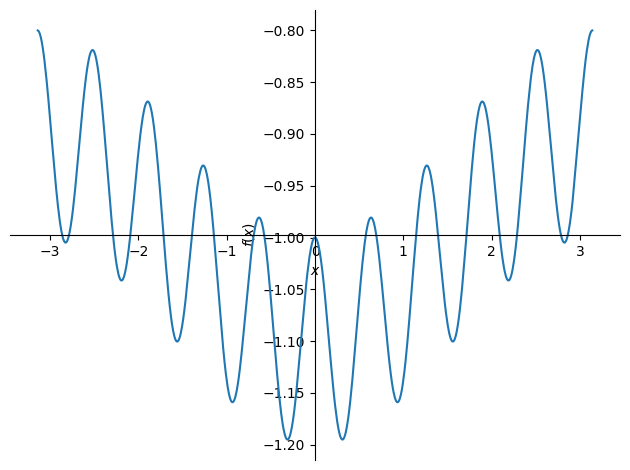

In [6]:
sp.plot(f_ejem(x)-g_ejem(x), (x, -3.14, 3.14))

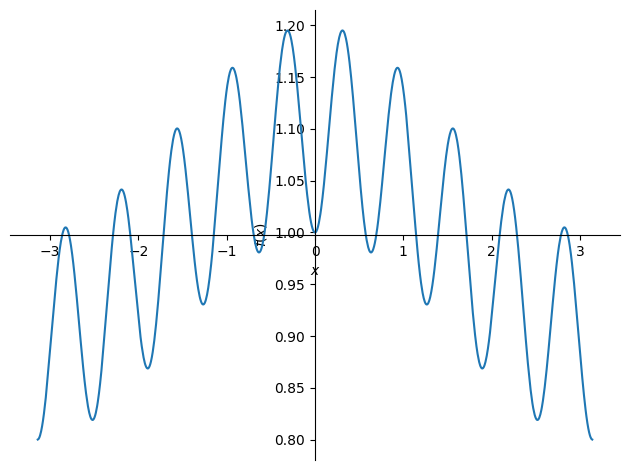

In [7]:
sp.plot(g_ejem(x)-f_ejem(x), (x, -3.14, 3.14))

### Producto

$f(x)g(x)$

In [8]:
(f(x)*g(x)).diff(x)

f(x)*Derivative(g(x), x) + g(x)*Derivative(f(x), x)

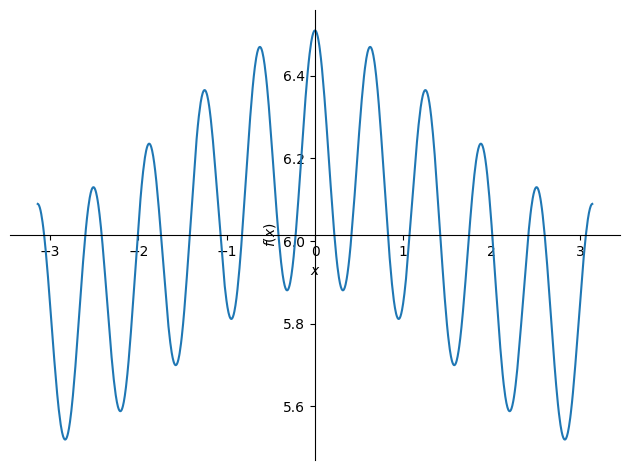

In [9]:
sp.plot(f_ejem(x)*g_ejem(x), (x, -3.14, 3.14))

### División

$\frac{f(x)}{g(x)}$

In [10]:
(f(x)/g(x)).diff(x)

-f(x)*Derivative(g(x), x)/g(x)**2 + Derivative(f(x), x)/g(x)

Para el error es necesario considerar ambos términos positivos

In [11]:
e_div1=-(2*0.1/9)+(0.1/3)
e_div1

0.01111111111111111

In [12]:
2/3-e_div1, 2/3+e_div1

(0.6555555555555556, 0.6777777777777777)

In [13]:
e_div2=(2 * 0.1 / 9) + (0.1 / 3)
e_div2

0.05555555555555555

In [14]:
2/3-e_div2, 2/3+e_div2

(0.611111111111111, 0.7222222222222222)

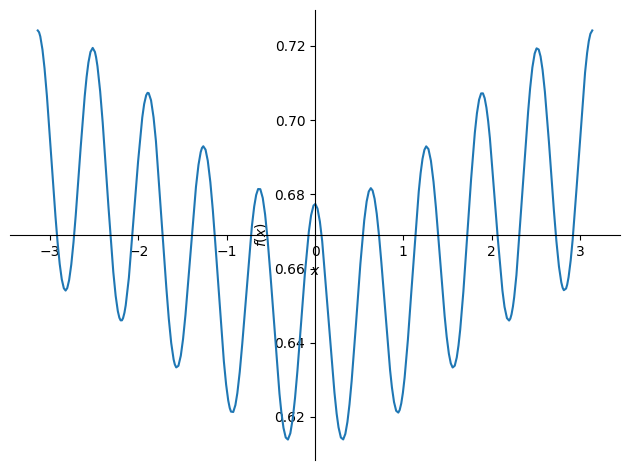

In [15]:
sp.plot(f_ejem(x)/g_ejem(x), (x, -3.14, 3.14))


### Raíz cuadrada

$\sqrt{f(x)}$

In [16]:
(sp.sqrt(f(x))).diff(x)

Derivative(f(x), x)/(2*sqrt(f(x)))

In [17]:
err=0.1/(2*sp.sqrt(2)).evalf()
err

0.0353553390593274

In [18]:
(sp.sqrt(2)-err).evalf(),  (sp.sqrt(2)+err).evalf()

(1.37885822331377, 1.44956890143242)

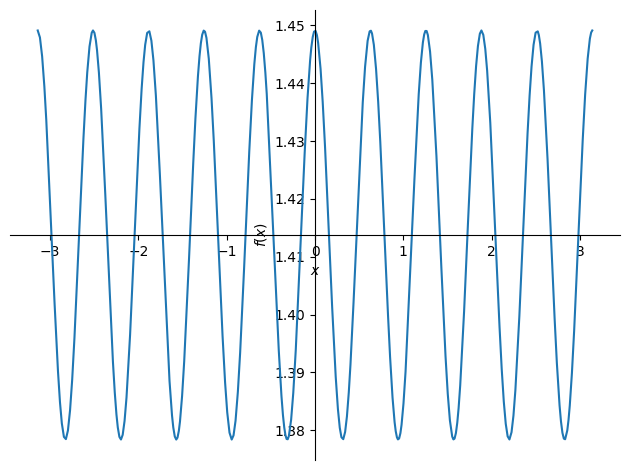

In [19]:
sp.plot(sp.sqrt(f_ejem(x)), (x, -3.14, 3.14))

### Ejemplo: Cuadrática


$x=\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}  $

Para el ejemplo asignamos cada una de las constantes con tres cifras significativas.

* $a \approx 3.21=3.21 \pm 0.01$
* $b \approx 20.2=20.2 \pm 0.1$
* $c \approx -431=431 \pm 1$

In [20]:
a = sp.Function('a')
b = sp.Function('b')
c = sp.Function('c')
d=((-b(x)+sp.sqrt(b(x)**2-4*a(x)*c(x)))/(2*a(x)))
d

(sqrt(-4*a(x)*c(x) + b(x)**2) - b(x))/(2*a(x))

In [21]:
cuad=d.subs(a(x), 3.21).subs(b(x), 20.2).subs(c(x), -431)
cuad

8.86057449729050

In [22]:
e1=((b(x)+sp.sqrt(b(x)**2+4*a(x)*c(x)))/(2*a(x))).diff()
e1

-(sqrt(4*a(x)*c(x) + b(x)**2) + b(x))*Derivative(a(x), x)/(2*a(x)**2) + (Derivative(b(x), x) + (2*a(x)*Derivative(c(x), x) + b(x)*Derivative(b(x), x) + 2*c(x)*Derivative(a(x), x))/sqrt(4*a(x)*c(x) + b(x)**2))/(2*a(x))

In [23]:
err_cuad1=e1.subs(sp.Derivative(a(x), x), 0.01).subs(sp.Derivative(b(x), x), 0.01).subs(sp.Derivative(c(x), x), 0.01).subs(a(x), 3.21).subs(b(x), 20.2).subs(c(x), 431)
err_cuad1

-0.0276931589943941

Reescribimos la derivada para colocar ambos términos positivos.

In [24]:
e2 = (sp.sqrt(4*a(x)*c(x) + b(x)**2) + b(x))*sp.Derivative(a(x), x)/(2*a(x)**2) + (sp.Derivative(b(x), x) + (2*a(x)*sp.Derivative(c(x), x) + b(x)*sp.Derivative(b(x), x) + 2*c(x)*sp.Derivative(a(x), x))/sp.sqrt(4*a(x)*c(x) + b(x)**2))/(2*a(x))
e2

(sqrt(4*a(x)*c(x) + b(x)**2) + b(x))*Derivative(a(x), x)/(2*a(x)**2) + (Derivative(b(x), x) + (2*a(x)*Derivative(c(x), x) + b(x)*Derivative(b(x), x) + 2*c(x)*Derivative(a(x), x))/sqrt(4*a(x)*c(x) + b(x)**2))/(2*a(x))

In [25]:
err_cuad2=e2.subs(sp.Derivative(a(x), x), 0.01).subs(sp.Derivative(b(x), x), 0.01).subs(sp.Derivative(c(x), x), 0.01).subs(a(x), 3.21).subs(b(x), 20.2).subs(c(x), 431)
err_cuad2

0.0667206066645232

In [26]:
cuad-err_cuad1,cuad+err_cuad1

(8.88826765628489, 8.83288133829611)

In [27]:
cuad-err_cuad2,cuad+err_cuad2

(8.79385389062598, 8.92729510395502)

A continuación visualizamos las tres constantes con el ruido y la cuadrática.

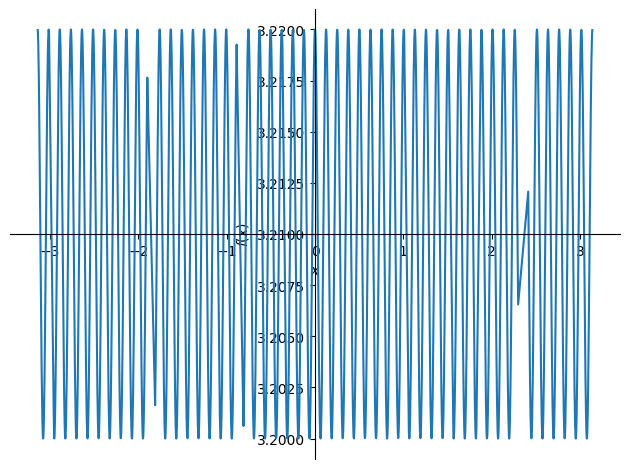

In [64]:
aej=lambda x: 3.21+0.01*sp.cos(50*x)
sp.plot(aej(x), (x, -3.14, 3.14))

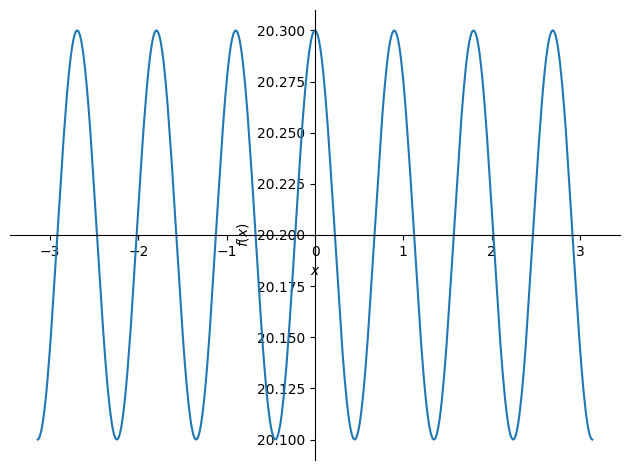

In [65]:
bej=lambda x: 20.2+0.1*sp.cos(7*x)
sp.plot(bej(x), (x, -3.14, 3.14))

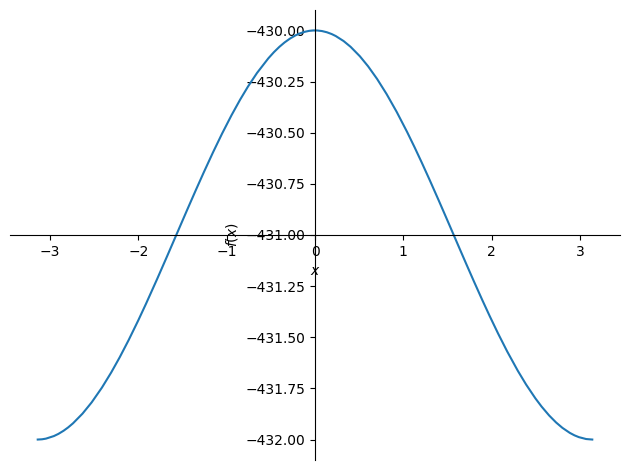

In [66]:
cej=lambda x: -431+1*sp.cos(1*x)
sp.plot(cej(x), (x, -3.14, 3.14))

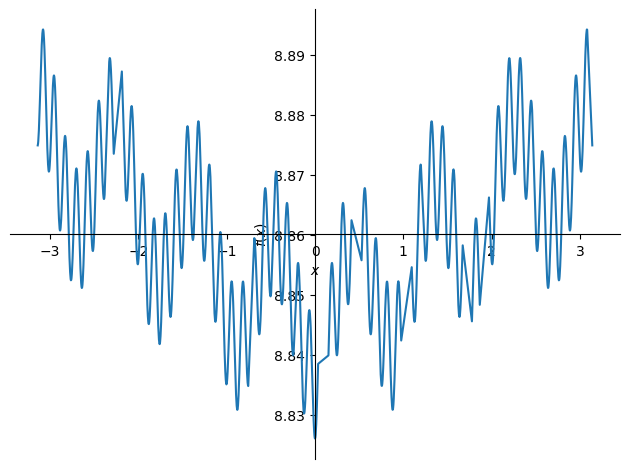

In [67]:
dej=lambda x:((-bej(x)+sp.sqrt(bej(x)**2-4*aej(x)*cej(x)))/(2*aej(x)))
sp.plot(dej(x), (x, -3.14, 3.14))

In [68]:
cuad

8.86057449729050

In [69]:
cuad-err_cuad2,cuad+err_cuad2

(8.79385389062598, 8.92729510395502)

## Referencias

* Análisis numérico básico, Luis Rodríguez Ojeda, Escuela Superior Politécnica del Litoral, 2016, Ver 4.4, Libro Digital.

* Análisis Numérico, J. A. Gutiérrez, M. A. Olmos, J. A. Casillas, Universidad de Guadalajara, Mc Graw Hill, 2010.

* Análisis Numérico, R. L. Burden, J. D. Faires, Math Learninig, Séptima edición.

* https://en.wikipedia.org/wiki/Condition_number